<a href="https://colab.research.google.com/github/Avit-hodibu/Covid-19-Corona-Website/blob/main/Ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble learning
collection of machine learning models.


**wisdom of the crowd**
Answer given by crowd is correct.


Prediction:
we have different base ML(any models like decision tree, regression, SVM etc) algo models. Fhese collective models is called ensemble model. These model need to different by data or algo.

In classification problem, if more model is saying it belong to some class than other. Then majority answer come from model is pick as correct.

In regression problem, the output come from each model is taken mean. This mean is answer.




**Types of Ensemble learning**
1. Voting ensemble: Base model are different algorithm(like, model 1= SVM, model 2 = LoR, model 3 = DT ) and same data set. We give same queries to all models. And take the majority count.

2. Bagging(Random Forest): Bootstrapped aggregation. same algorithm but have different dataset.

  For eg: we have 1000 dataset and make 3 model of same algo (SVM). we randomly take 500 dataset and put in model1 and another 500 randomly in another model2 and another 500 in model3. We take the mean of it.

  Random forest is especial case of bagging where Decision Tree is use. That is why name is forest a collection of trees

3. Boosting(Adaboosting, Gradient boosting, XgBoosting): Most powerful technique. We take same model algo. we put data on model1 and it will notedown what are the mistakes. It tell all the mistake to the model that is after him and give data too . So, it can improve from mistake. It will do same note the mistake and give it to another model. It will again improve from mistake. It work on series and improve the mistake.

4. Stacking: Base model are different algorithm(like, model 1= SVM, model 2 = LoR, model 3 = DT ) and same data set.  There is another model below that base model which will in herite all the answer of the base models and assign weight according to there correctness prediction. more the base model predict correct have the high weight than other. We give same queries to all models.

AD:
1. improvement in performance
2. low bias and low variance
3. robustness

Dis:
1. computational complexity increase

When to use = always

## Voting ensemble


Our models are train with same data. When the system is train the model is ready for prediction. Now, we call new queries data . We send Yq to all model. classification(The answer that comes from all models is counted. And we pick the majority.) regression (we take a mean of the answer)

Assumption:
1. All models should be independent to perform better. If the model are similar it wont perform good.
2. all models accuray should be more than 50%

Can we created strong model using weak models(model have accuracy aleast 51%)?

-> Accuracy increase as added independent model by little.

if accuray less than 50 then adding more model will decrease it's accuracy rather than increaseing.


### Voting Classifier:

We count majority from the models as the answer.


Voting type:

1. Hard voting:
if in model1,  0 has 0.6 prob and 1 has 0.4 then we see model1 predict 0. and in model2, 0 has prob as 0.8 and 1 has 0.2 then we see model2 perdict 0. So, overll will be 0.

2. Soft voting:
if in model1,  0 has 0.6 prob and 1 has 0.4 and in model2, 0 has prob as 0.8 and 1 has 0.2 then we will add 0 probability and 1 probablity of all model, model1 and model2.

  0 proba = (0.6 + 0.8)/2 = 0.7

  1 proba = (0.4 + 0.2)/2 = 0.3

  then only since 0 has high prob so 0 is answer.

Most of the time soft voting is better than hard voting.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#all models
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

#model
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

#voting classifier
from sklearn.ensemble import VotingClassifier

#hard
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

#soft
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

Weight voting:
```
# model1 = 1 , model2= 2 and model3 =3 weight
VotingClassifier(estimators=estimators,voting='soft', weights=[1, 2, 3])
```

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [ ]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


As you can see it is performing better.

### Voting Regression:


We will take a mean of answers from model and the mean will be answer.

In [ ]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

## Bagging



Bootstraping + Aggregation = bagging

Bootstraping = from given population we draw sample randomly.

Lets take a dataset D10k rows. This is classification. We take multiple base model be m1, m2, m3, m4, ... m100. we make sure all model algorithm are same. we train these models with different part of the dataset D1,D2,...D100 that is 1k each by sampling(it can be with replacement and without replacement also). Each model will be train by different dataset. This is bootstraping

Aggregation=

Now, We have a queries. We give this queries to all the model and get the answers from each model. The we pick the majority count as answer. This is aggregation

Why this work?

-> Bias and Variance are negatively correlated. But when we use bagging Low
bias and low variance is possible.

Impact of the noise data is distributed to different models while sampling the data.So, the result will have less noise.



In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# removing some col
# making binary so remove data of target 0
df = df[df['target'] != 0][['sepal width (cm)','petal length (cm)','target']]
df.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


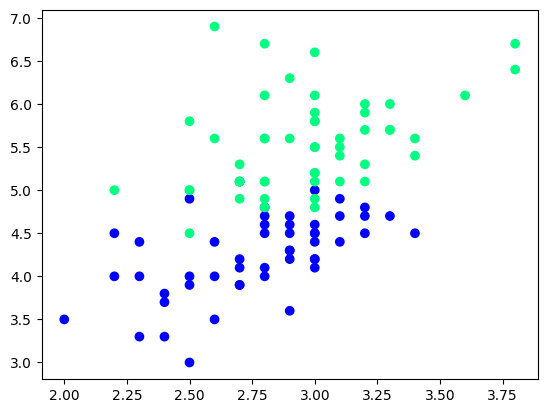

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c=df['target'],cmap='winter')

In [ ]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [ ]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),target
102,3.0,5.9,2
102,3.0,5.9,2
123,2.7,4.9,2
136,3.4,5.6,2
70,3.2,4.8,1
73,2.8,4.7,1
137,3.1,5.5,2
55,2.8,4.5,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
dt_bag1 = DecisionTreeClassifier()


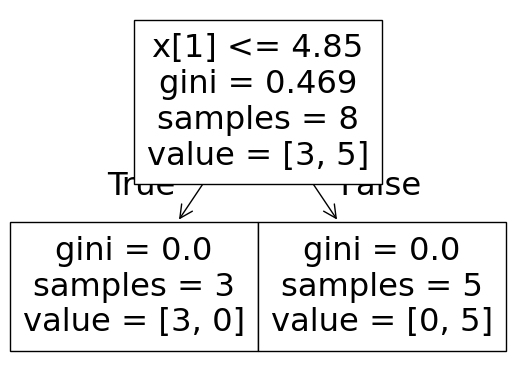

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


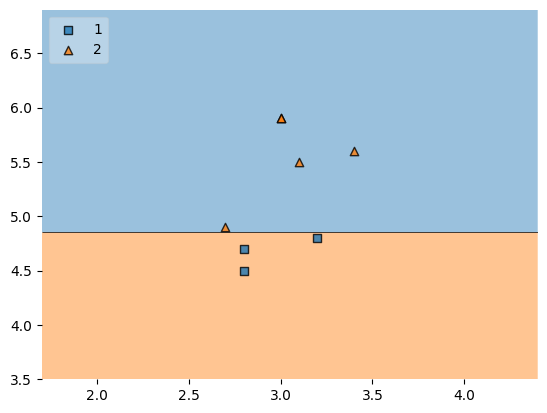

In [ ]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
evaluate(dt_bag1,X,y)

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),target
101,2.7,5.1,2
101,2.7,5.1,2
51,3.2,4.5,1
51,3.2,4.5,1
137,3.1,5.5,2
123,2.7,4.9,2
55,2.8,4.5,1
137,3.1,5.5,2


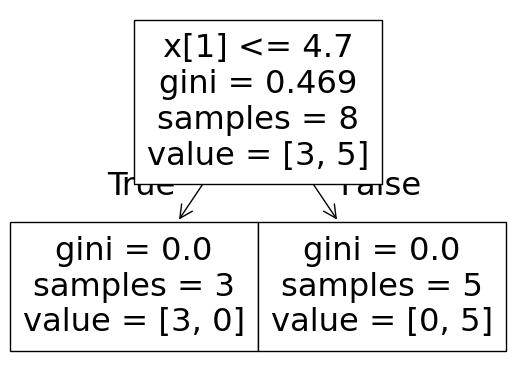

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


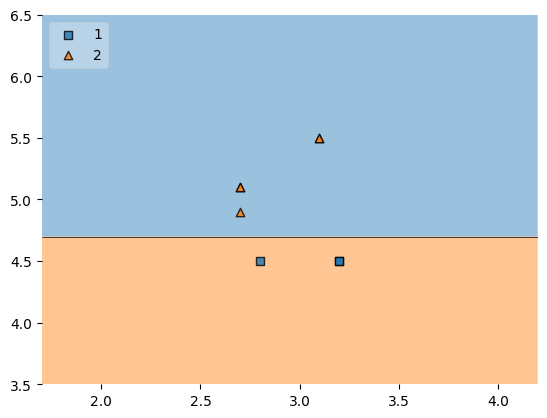

In [ ]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),target
106,2.5,4.5,2
55,2.8,4.5,1
106,2.5,4.5,2
101,2.7,5.1,2
106,2.5,4.5,2
51,3.2,4.5,1
102,3.0,5.9,2
55,2.8,4.5,1


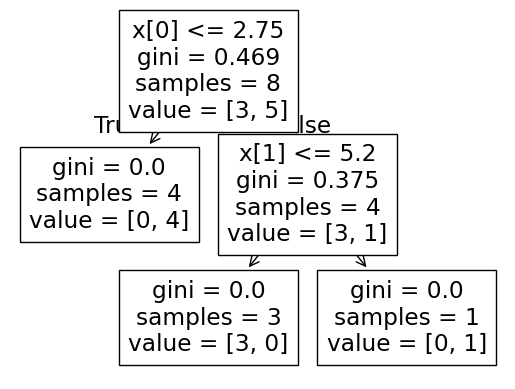

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.4


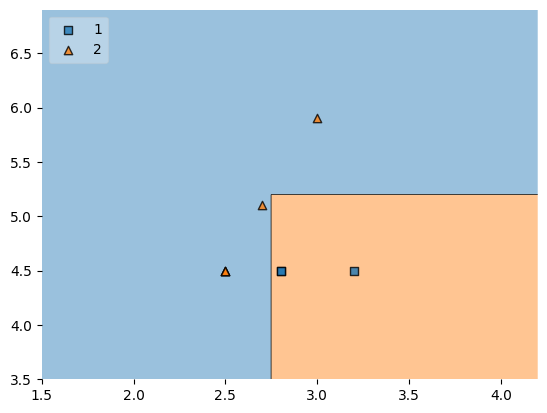

In [ ]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

**predict**

In [ ]:
df_test

,sepal width (cm),petal length (cm),target
79,2.6,3.5,1
130,2.8,6.1,2
121,2.8,4.9,2
85,3.4,4.5,1
129,3.0,5.8,2


In [ ]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


since majority is 2 so answer is 2

**Pasting**

In [ ]:
# Row sampling without replacement
df_train

,sepal width (cm),petal length (cm),target
101,2.7,5.1,2
55,2.8,4.5,1
123,2.7,4.9,2
73,2.8,4.7,1
136,3.4,5.6,2
137,3.1,5.5,2
70,3.2,4.8,1
106,2.5,4.5,2
51,3.2,4.5,1
102,3.0,5.9,2


In [ ]:
df_train.sample(8)

,sepal width (cm),petal length (cm),target
70,3.2,4.8,1
55,2.8,4.5,1
102,3.0,5.9,2
101,2.7,5.1,2
123,2.7,4.9,2
51,3.2,4.5,1
136,3.4,5.6,2
106,2.5,4.5,2


**Random Subspaces**
col sampling, not row

In [ ]:
df1.sample(2,replace=True,axis=1)

**Random Patches** row and col both sampling

In [ ]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

### Bagging Classifers

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
X,y = make_classification(n_samples=10000, n_features=10,n_informative=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy",accuracy_score(y_test,y_pred))

Decision Tree accuracy 0.8545


**Bagging**

In [ ]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
    )
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
accuracy_score(y_test,y_pred)

0.9035

**Pasting**

In [ ]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=False,
    random_state=42,
    verbose = 1,
    n_jobs=-1 # multi core use
)
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Pasting classifier",accuracy_score(y_test,y_pred))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   24.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Pasting classifier 0.9035


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.5s finished


**Random Subspaces**

In [ ]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=False,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42
)
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Subspaces classifier",accuracy_score(y_test,y_pred))

Random Subspaces classifier 0.8955


**Random Patches**


In [ ]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42
)
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Patches classifier",accuracy_score(y_test,y_pred))

Random Patches classifier 0.9


**OOB score (Out Of Bag)**: while sampling without replacement, these data are not seen in sampling data from the dataset.

these data is use to check performance of the model accuracy.  

In [ ]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    oob_score=True,
    random_state=42
)
bag.fit(X_train,y_train)
bag.oob_score_

0.907375

In [ ]:
y_pred = bag.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.904


**Bagging tips**

- baaging generally gives better result than pasting
- good result comes around 25% to 50% roe sampling mark
- Random patches and subspaces should be used while dealing with high dimensional data
- to find correct hyperparameter values we can do GridSearchCV/RandomSearchCV

**GridSearchCV** it give best parameter

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [50,100,500],
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
    }
search = GridSearchCV(BaggingClassifier(), parameters, cv=5)
search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.4, 0.7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [50, 100, 500]})

In [ ]:
search.best_score_

In [ ]:
search.best_params_

### Bagging regressor

We take mean here.

In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

### Random Forest

It is a collection of trees

It is a algorithm that give better result in all types of algorithm even without turning. It is used for both regressor and classifier.

Random = Bagging techinque -> bagging come from bootstrapped Aggregation -> bootstrapped is sampling which is random.

Forest = multiple DT train

In bagging if we use DT then it is random forest.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.890269,-1.247332,-2.134747,3.322125,0.673388,1
1,2.444568,-0.192633,4.907083,4.444178,-3.548695,0
2,2.079141,1.112688,-1.009546,-0.560581,-1.125618,1
3,-0.905353,0.045377,0.810364,1.063607,-2.308008,0
4,-0.576579,0.432982,2.971421,4.476445,-2.553479,0


In [ ]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [ ]:
# function for feature sampling
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [ ]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [ ]:
df1 = combined_sampling(df,0.5,0.5)
df2 = combined_sampling(df,0.5,0.5)
df3 = combined_sampling(df,0.5,0.5)

<ipython-input-6-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-6-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-6-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [ ]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col5', 'target'], dtype='object')
Index(['col1', 'col4', 'target'], dtype='object')
Index(['col5', 'col3', 'target'], dtype='object')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import plot_tree

[Text(0.4444444444444444, 0.9166666666666666, 'x[1] <= -0.422\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.2222222222222222, 0.75, 'x[0] <= -0.671\ngini = 0.172\nsamples = 21\nvalue = [19, 2]'),
 Text(0.3333333333333333, 0.8333333333333333, 'True  '),
 Text(0.1111111111111111, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.6666666666666666, 0.75, 'x[1] <= 0.843\ngini = 0.185\nsamples = 29\nvalue = [3, 26]'),
 Text(0.5555555555555556, 0.8333333333333333, '  False'),
 Text(0.5555555555555556, 0.5833333333333334, 'x[1] <= 0.588\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.4444444444444444, 0.4166666666666667, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6666666666666666, 0.4166666666666667, 'x[1] <= 0.629\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.5555555555555556, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7777777777

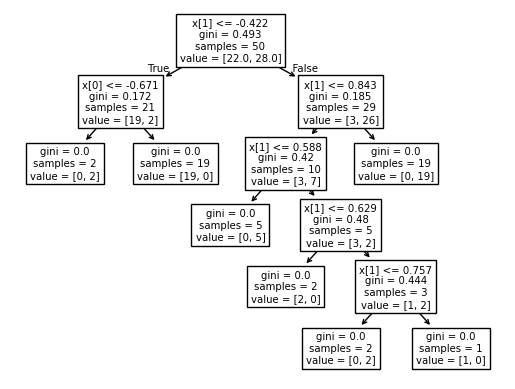

In [ ]:
plot_tree(clf1)

[Text(0.4583333333333333, 0.9285714285714286, 'x[0] <= -0.227\ngini = 0.471\nsamples = 50\nvalue = [31, 19]'),
 Text(0.16666666666666666, 0.7857142857142857, 'x[0] <= -1.383\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(0.3125, 0.8571428571428572, 'True  '),
 Text(0.08333333333333333, 0.6428571428571429, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.25, 0.6428571428571429, 'x[0] <= -1.04\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= 1.771\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.08333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.7857142857142857, 'x[0] <= 1.041\ngini = 0.453\nsamples = 26\nvalue = [9, 17]'),
 Text(0.6041666666666666, 0.8571428571428572, '  False'),
 Text(0.6666666666666666, 0.6428571428571429, 'x[0] <= 0.

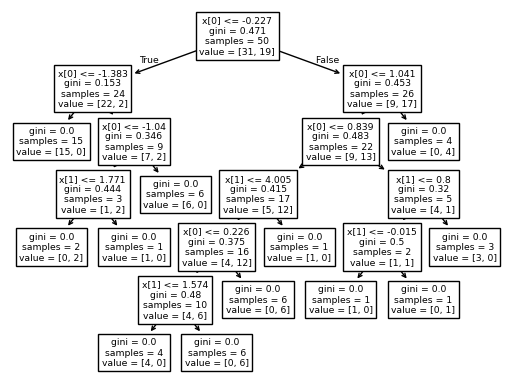

In [ ]:
plot_tree(clf2)

[Text(0.4, 0.875, 'x[0] <= -0.232\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[0] <= 0.749\ngini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 0.491\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]')]

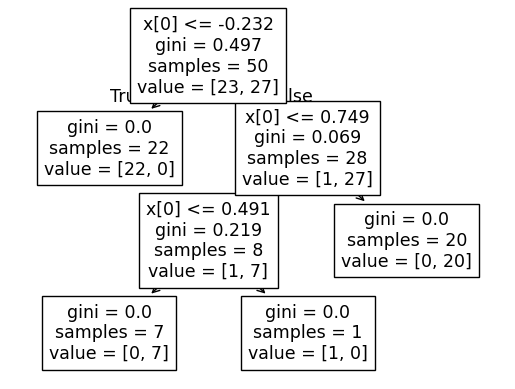

In [ ]:
plot_tree(clf3)

**Bias variance and random forest**

high bias = no good training

high variance= no good testing

LB HV :
fully grown DT, SVM, KNN

HB LV:
LR

These case is help by random forest. when we give LB HV algo, this will convert LB LV model. What do it is, it will just reduce variance without touching bias.

**How will this happen?** -> We take a base models which is all DT and they are fully grown DT. It means all are LB HV. We feed subset data to all algorithm of base models. So, bias remain low. In case of variance, intresting thing happen. Since, we are picking data randomly from dataset to put in base models algorithm, noisey data that are in dataset are divide into different dataset which is used to train model. This will reduce noise of dataset. This means variance will also decrease. so the overall model will be LB LV.


**Classifier**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

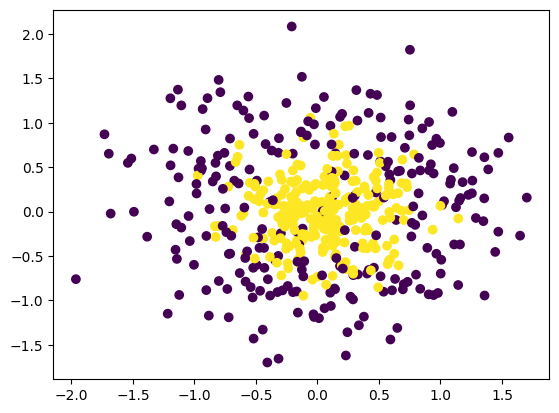

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

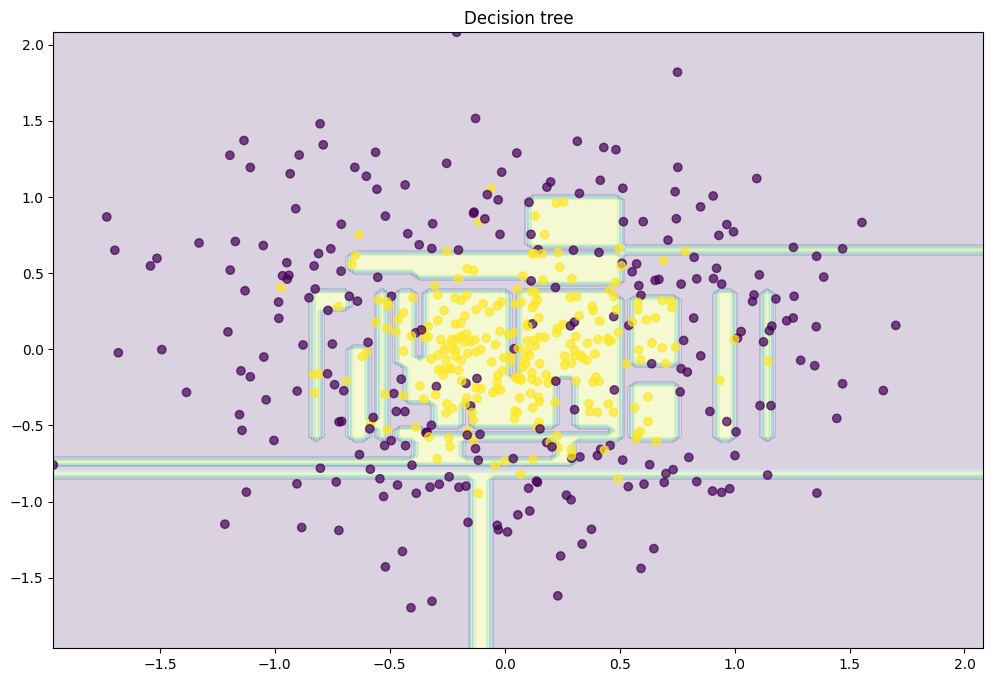

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

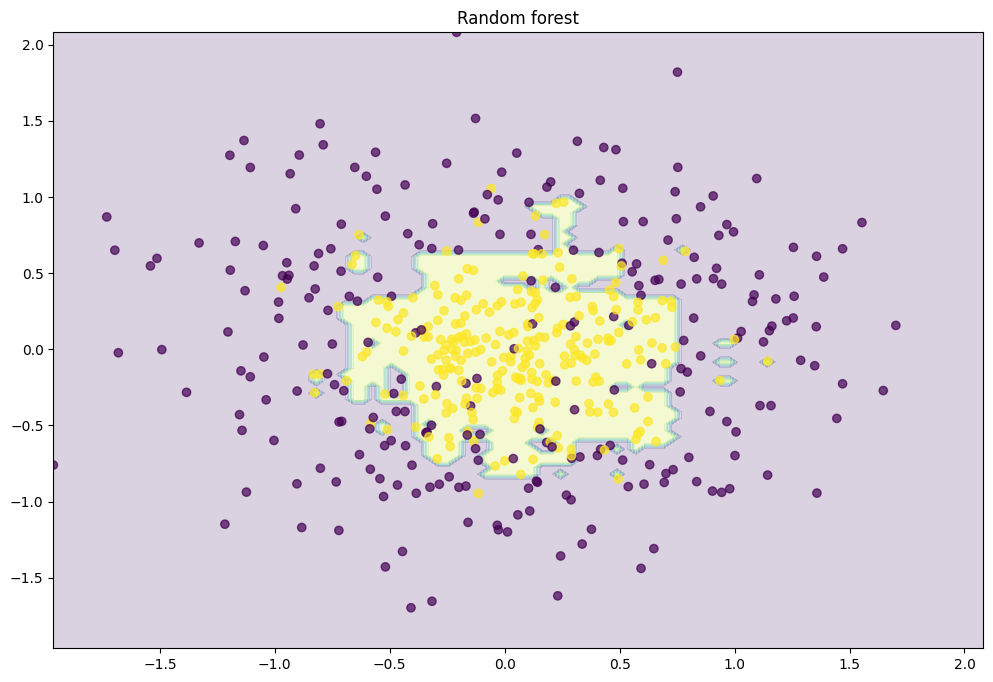

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

**Regressor**

In [ ]:
n_train = 150
n_test = 1000
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

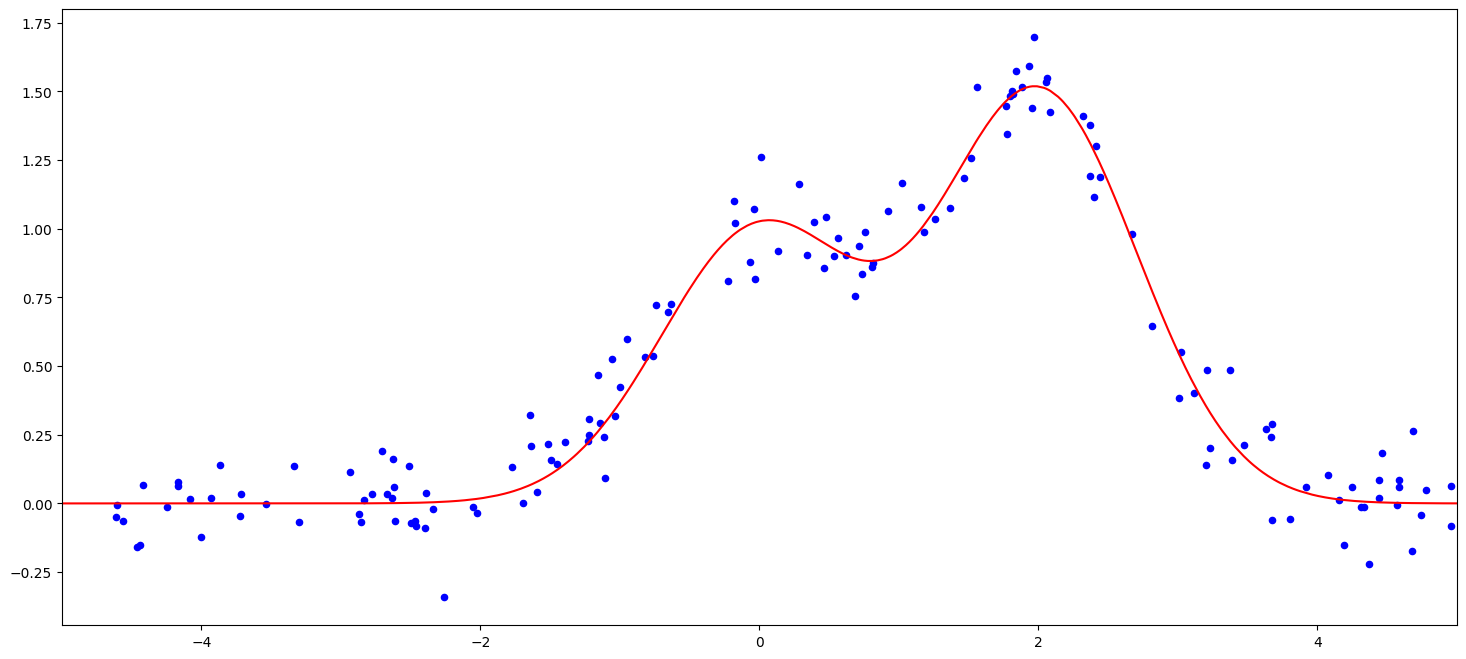

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 22.70')

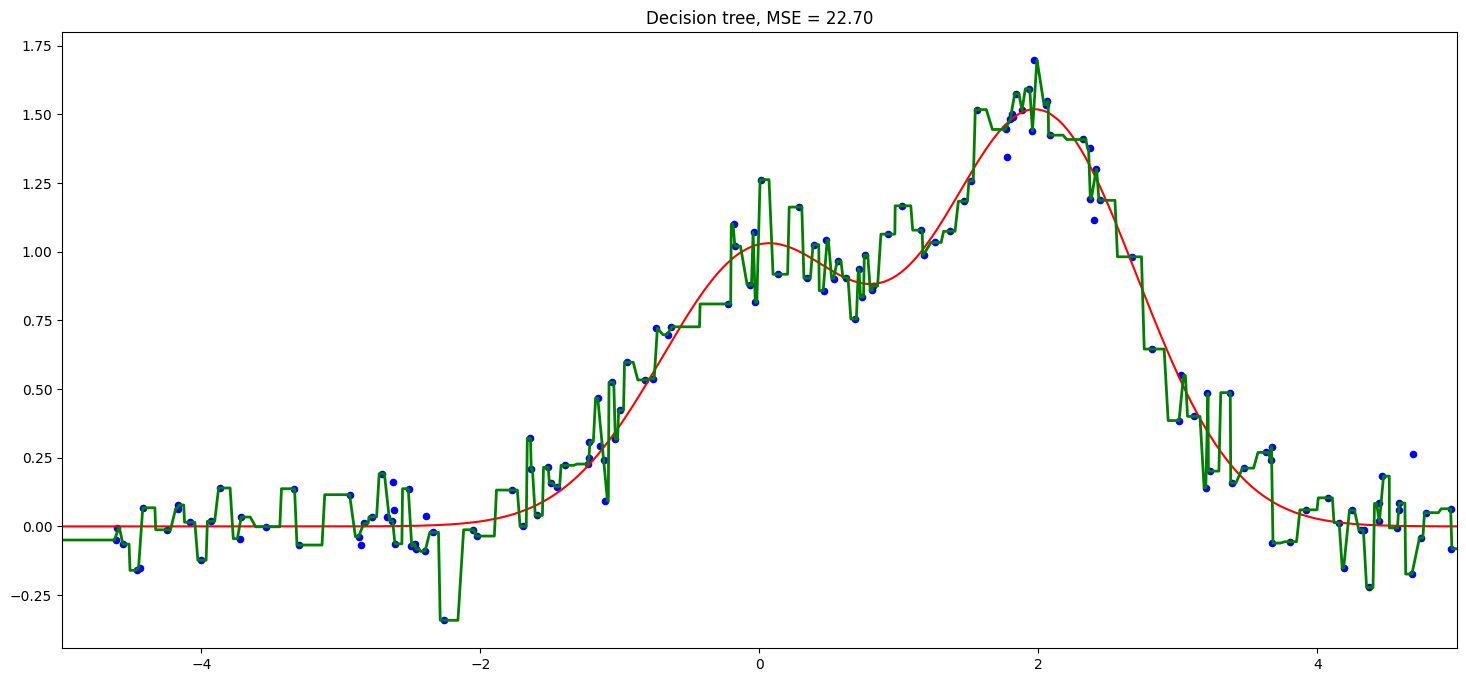

In [ ]:
# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f"
          % np.sum((y_test - d_predict) ** 2))

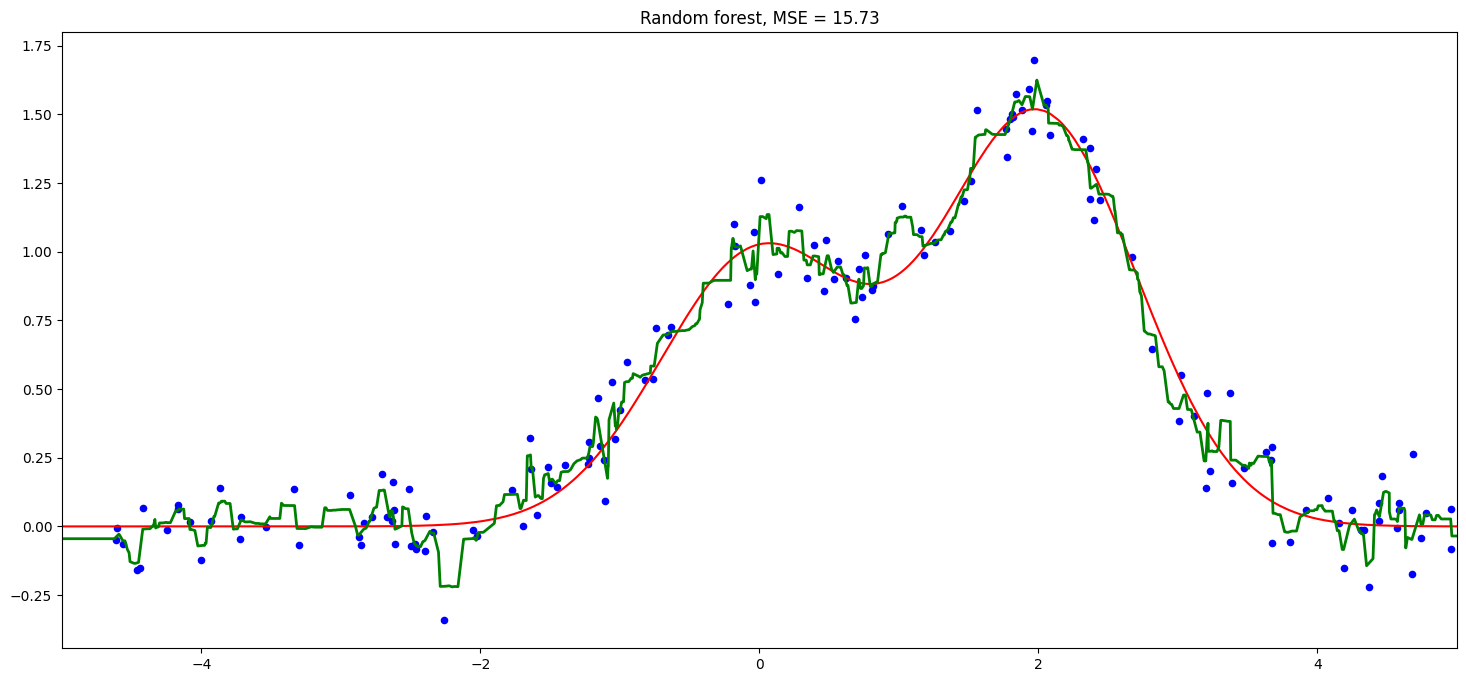

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));


**Bagging Vs Random Forest**

Bagging = DT, KNN, SVM

Random forest = DT only

question is if bagging is created by Dt then can we call it random forest? -> NO.

difference is feature sampling.

for bagging=> tree level col sampling. for eg:- 3 model, col sampling = 2, col= 4. model1 1,3/ model2 2,4/ model3 1,2. model1 spliting occour because of col 1 or col 3 of whole tree. and so on.

for RF => node level col sampling. for eg:- 3 model, col sampling = 2, col= 4. Here in case model node there is sampling. model1 node1 take sampling from col 1,2 and in node2 again sampling happen it may take from col 2,4 and so on. similiar things happen for other model2 and model3 also. It create more randomness.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [ ]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.482079,1.841173,-2.217369,-2.036439,0.197381,1
1,0.380785,-0.124146,-1.401927,1.809635,-1.020447,0
2,0.270875,-1.069133,-2.016631,3.571289,-0.369521,0
3,1.405641,-1.826020,-2.905879,-0.414879,0.339778,0
4,0.854174,0.691846,-0.027003,-0.609300,-2.149680,0


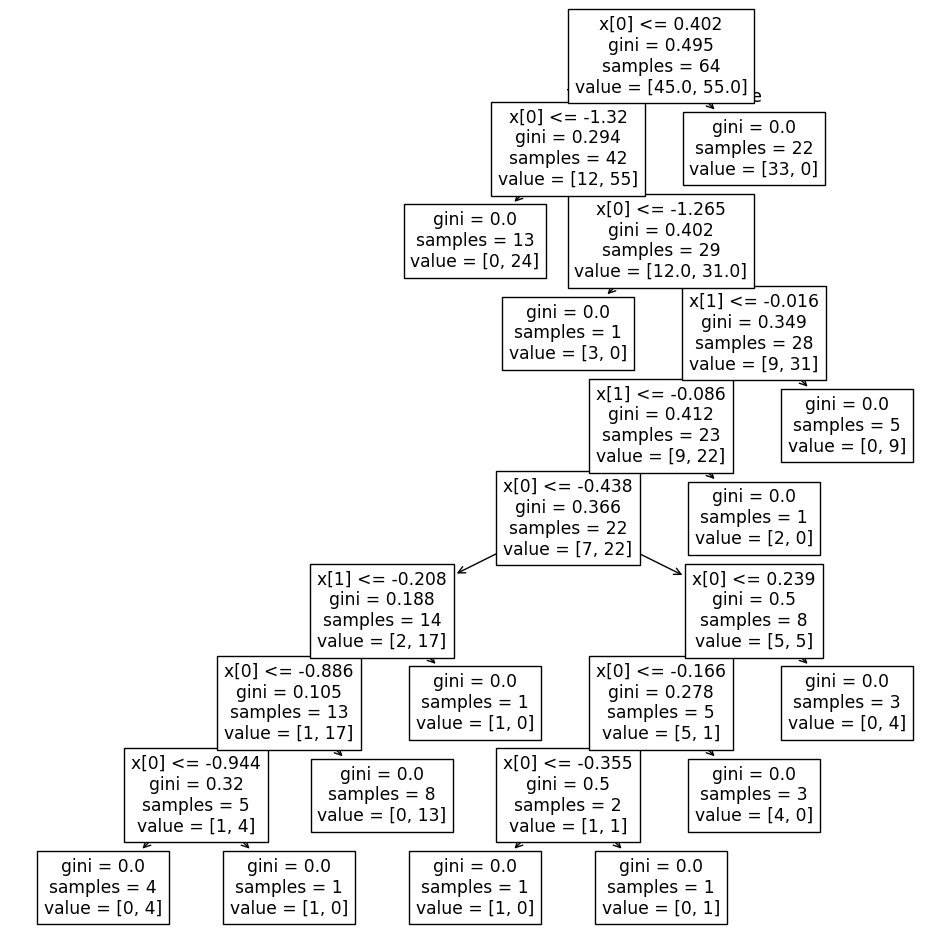

In [ ]:
#bagging
bag = BaggingClassifier(max_features=2)
bag.fit(df.iloc[:,:5],df.iloc[:,-1])
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

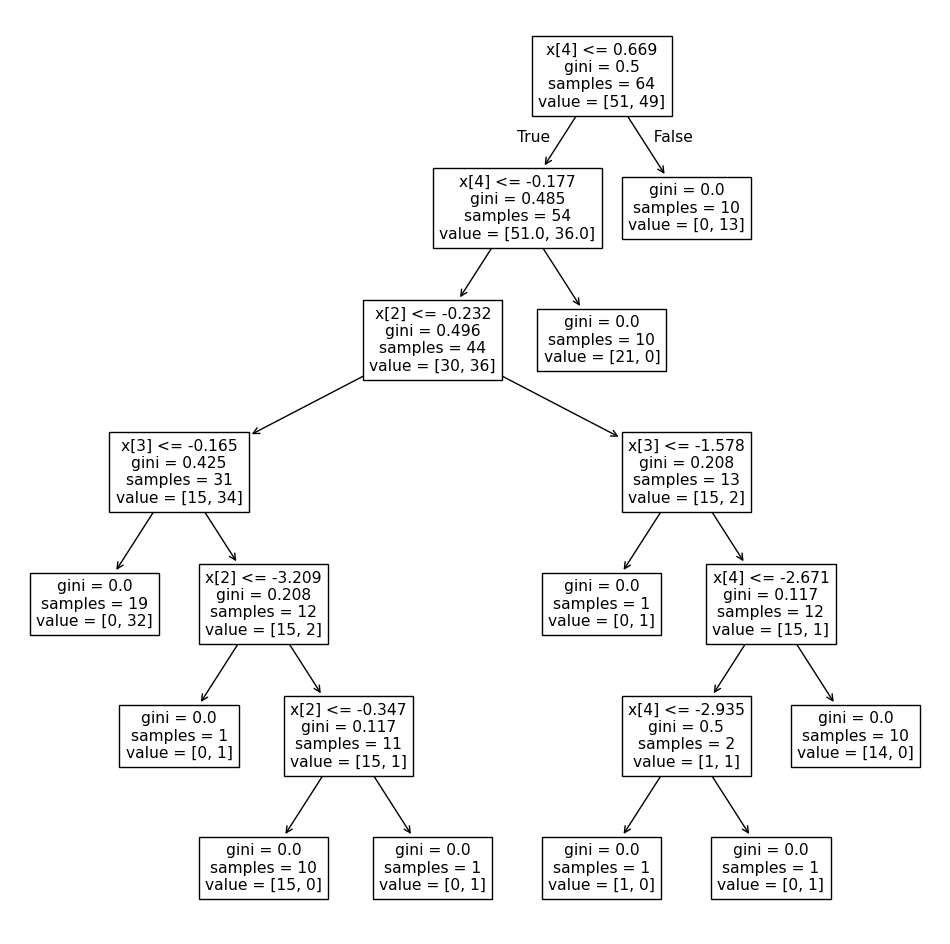

In [ ]:
# random forest
rf = RandomForestClassifier(max_features=2)
rf.fit(df.iloc[:,:5],df.iloc[:,-1])
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

**Hyperparameter**

Random Forest:

n_estimators-> number of DT

max_features = number of col

bootstrap= random or not select row aand col

max_sample= rows

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# GridSearchCV
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

rf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf,
                       param_grid = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)
rf_grid.fit(X_train,y_train)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [ ]:
rf_grid.best_params_

{'max_depth': 2, 'max_features': 0.2, 'max_samples': 1.0, 'n_estimators': 120}

In [ ]:
# RandomSearchCV
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

rf_grid.fit(X_train,y_train)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 433, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [ ]:
rf_grid.best_params_

{'n_estimators': 120,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_samples': 1.0,
 'max_features': 0.6,
 'max_depth': None,
 'bootstrap': True}

In GridSearchCV, it will check each parameters but in RandomSearchCV it will select some paramters randomly.

GridSearchCV is slower and can be use for small dataset because of computation time, but RandomSearchCV is faster and can be use for larger dataset

GridSearchCV is more accurate

**OOB Evaluation**

Out Of Bag: In sampling with replacement, we may have row in dataset which will not be selected for modeling. This row is called OOB sample. We can use these data to test the model. This is the concept. Mostly 37% data id OOB data. THis set can be use for validation set.








In [ ]:
rf = RandomForestClassifier(oob_score=True) # oob_score = True to use oob

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

In [ ]:
rf.oob_score_ # this give the accuracy of the model by validating from the oob data

0.8305785123966942

In [ ]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8688524590163934

**Feature Importance**

Importance of column. This can be use for feature selection.

This give interpretablity.


In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
X,y = make_classification(n_samples=5, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               random_state=0)


dt = DecisionTreeClassifier()
dt.fit(X,y)


DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[0] <= -0.875\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

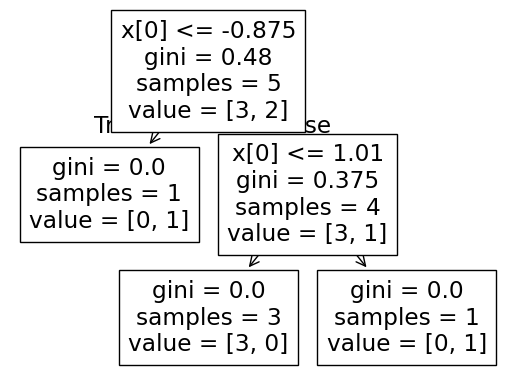

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dt)

In [ ]:
dt.feature_importances_

array([1., 0.])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X,y)
rf.feature_importances_

array([0.20833333, 0.79166667])

## Boosting

### Adaboosting

weak learners: accuracy just above 50%. In adaboost we use multiple weak learner to make powerful model

decision stumps: It is type of weak learners. DT which has max depth 1. In decision stumps we can make only one split

+1 amd -1: positive points +1 snd -ve id -1.


Adaboost is a stagewise Additive method. adaboost is made by adding multiple weak learner. Stagewise is sequence wise add.

 we fit decision stumps by which in entropy there is most reduction in data set. we create regions (in binary class we have 2 region).

but what happen is some data is in opposite region where it's not their place. So, now it will tell another stump that he has done mistake in these some data so, please handle it carefully. So, when we send data in another stage it will increase focus on that data which it has done mistake in prevous.This technique is Upsampling. We also calculate weight of that stage according to final prediction by this model. We will calculate how correctly it predicted according to it we assign weight.

In anothe stage we increase the importance of that incorrectly partation data by upscaling. We repeat other as same

These whole process repeat again and again

Formula Adaboost function = sign (sum of i to n alpha i * hi(x))

where alpha is weight of each stage

if +ve then +1 and if -ve then -1.



number of rows = n

we assign weight to each rows W initally where W = 1/n

Stage 1:

we train DT which has max depth 1 that is decision stump.

we choose the DS in which we have max gainy or entropy. That model DS is m1

We give input to DS model yo find ouput i.e. y_pred.
NOw, we find some error in y_pred. We need to find alpha (alpha1) We need to find durimg pur final prediction how much daoes it save?  weight of model1. alpha depend on the rate of error of model.error rate and alpha is inversely  proportional.

How alpha is calculate?
- have 3 model
we nwwd to find the accuracy of model. Let the model error rate be 0% 50% 100 we can say 100% model good between 50% 100 %. Beacuse we know it gona day incorrect answer so reliable.  

formula of alpha = 1(ln(1-error)/ error)/ 2

How to calculate error?
-> error = sum weight of rows which is miss-classified.


stage - 2:

we boost or increase the value of missed classified data weight. and well classified data we need to decrease weight

For Misclassified: new_wt = curr_wt * e^(alpha)

For correctly classified: new_wt = curr_wt * e(-alpha)

We need to make sure the sume of weight should be 1. so, if it is not we need to normalized. For normalized

normalized = each updated weight/ (total added updated weight)

This normalied weight give 1 when added whole.



Stage 3: Upsampling :

for this first we need to create another column range. Start from 0. add new_wt to previous range

For eg:
new_wt = 0.166, 0.25, 0.25, so on

range = 0-166, 0.166- 0.410, 0.416- 0.666
 and so on keep adding new_wt

 Now, we generate n number of random number between 0 -1.n is number of dataset.  The numbewr which is comming from this is than compare with range. And if it is in that range then we will pick that row. And make new dataset with that row. This dataset will go for next repeated stage.












**How Does The AdaBoost Work?**

_> We can understand the working of the AdaBoost algorithm in step by step manner as going deep into the work, we can see there are multiple basic steps which this algorithm follows. Let’s take a look at these steps.

Step 1: When the algorithm is given data, it starts by Assigning equal weights to all training examples in the dataset. These weights represent the importance of each sample during the training process.

Step 2: Here, this algorithm iterates with a few algorithms for a specified number of iterations (or until a stopping criterion is met). The algorithm trains a weak classifier on the training data. Here the weak classifier can be considered a model that performs slightly better than random guessing, such as a decision stump (a one-level decision tree).

Step 3: During each iteration, the algorithm trains the weak classifier on given training data with the current sample weights. The weak classifier aims to minimize the classification error, weighted by the sample weights.

Step 4: After training the weak classifier, the algorithm calculates classifier weight based on the errors of the weak classifier. A weak classifier with a lower error receives a higher weight.

Step 4: Once the calculation of weight completes, the algorithm updates sample weights, and the algorithm gives assigns higher weights to misclassified examples so that more importance in subsequent iterations can be given.

Step 5: After updating the sample weights, they are normalized so that they sum up to 1 and Combine the predictions of all weak classifiers using a weighted majority vote. The weights of the weak classifiers are considered when making the final prediction.

Step 6: Finally, Steps 2–5 are repeated for the specified number of iterations (or until the stopping criterion is met), with the sample weights updated at each iteration. The final prediction is obtained by aggregating the predictions of all weak classifiers based on their weights.

<Axes: xlabel='X1', ylabel='X2'>

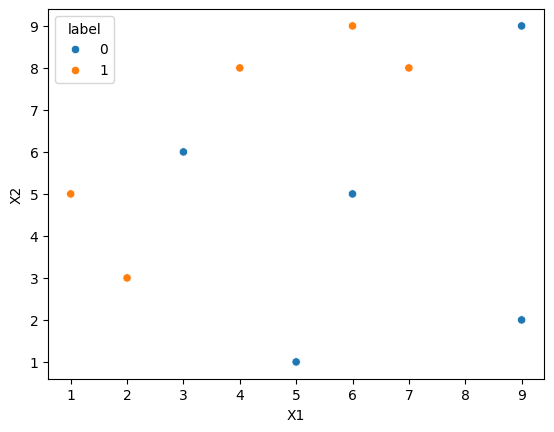

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

df = pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [ ]:
#assiginig equal weight
df['weights'] = 1/df.shape[0]
df.head()

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1


[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

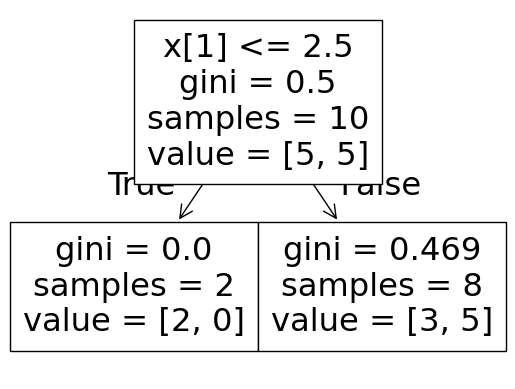

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#decision Stumps
dt1 = DecisionTreeClassifier(max_depth=1)
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values
# Step 2 - Train 1st model
dt1.fit(X,y)
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

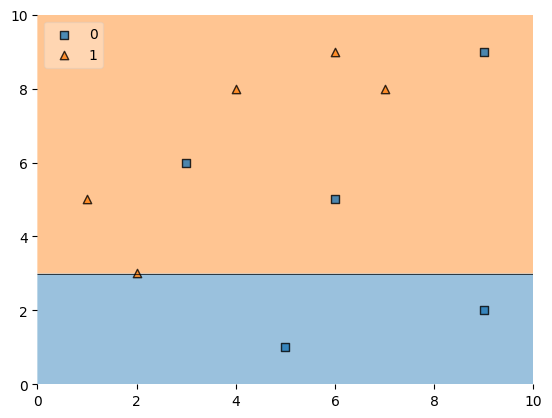

In [ ]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [ ]:
df['y_pred'] = dt1.predict(X)
df.head()

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0


In [ ]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [ ]:
df.head()

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508


In [ ]:
df['updated_weights'].sum()

0.9165153319682015

In [ ]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()\

df.head()

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475


In [ ]:
df['nomalized_weights'].sum()

1.0

In [ ]:
#upsampling
#range
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [ ]:
#random dataset
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices
index_values = create_new_dataset(df)

index_values

[3, 8, 0, 6, 2, 9, 0, 5, 4, 2]

In [ ]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df.head()

,X1,X2,label,weights
3,4,8,1,0.1
8,9,9,0,0.1
0,1,5,1,0.1
6,6,5,0,0.1
2,3,6,0,0.1


**Repeat same process again and again**

In [ ]:
dt2 = DecisionTreeClassifier(max_depth=1)

Prediction
```
np.sign(sum alphai * i)

```

**Hyperparamter**
n_estimators= number of base model

algorithm : ['SAMME, SAMME.R]

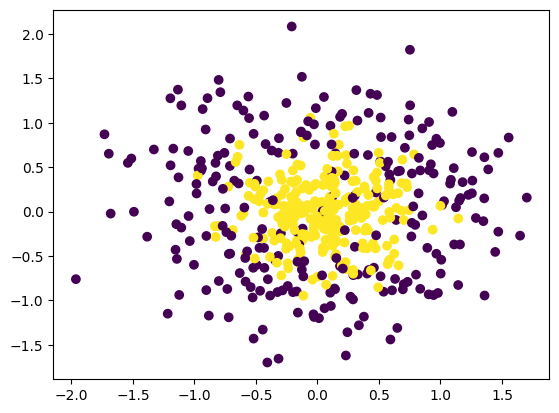

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}


### Gradient Boosting


Same as Adaboosting, we will focus on data in which previous model has done mistake. This is how we improve.




**Regression**

stage 1:
In first model, no matter what value you put it will give the output(prediction) the average of all y (all value of y added/ number of rows)mean.

loss function (pseudo-residual) = actual - predicted

stage 2: we will send with pseudo-resudual of model 1 to model 2 (Decision Tree).

We will give input X, y as pseudo-residual of model 1 to training  and want to predict not y, but the pseudo-residual in model 2 using Decision Tree.

if only 2 model then pred = model1 output(pred1) + model2 output(pred 2)

This can be overfitting. To be safe from it we use learning rate. Using learning rate will create small steps to predict correct answer. So, we need more models.

formula = pred = m1+lr*m2

we again do residu2 = actual - pred2

and create columm residue2 send to next model

Step 3: keep on doimg like step 2
 pred= m1 + lr * m2 + lr * m3

what we need is value of residual need to zero.





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

import pandas as pd

df = pd.DataFrame()

df['X'] = X.reshape(100)
df['y'] = y

df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


In [ ]:
# model 1
#mean
df['pred1'] = df['y'].mean()

#residue
df['res1'] = df['y'] - df['pred1']

df.head()

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


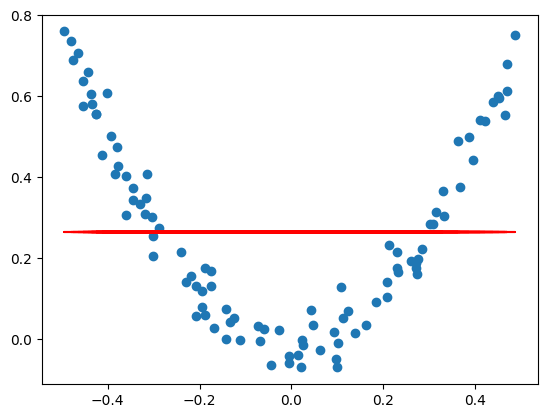

In [ ]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

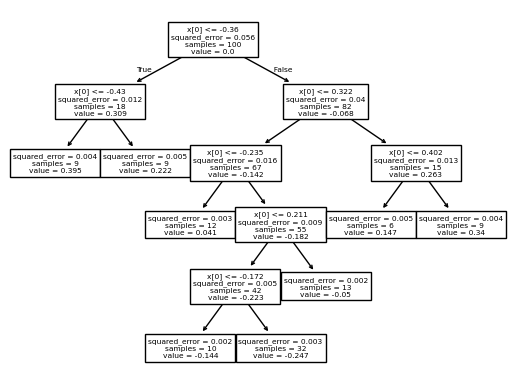

In [ ]:
#model 2
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

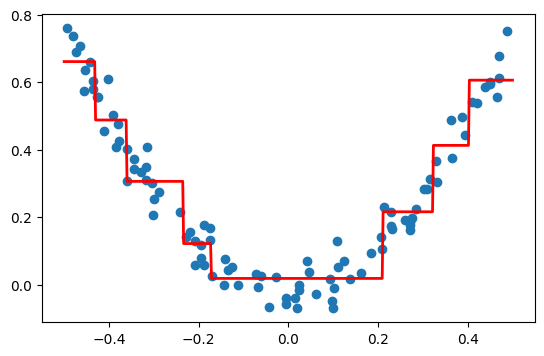

In [ ]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)

y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [ ]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))
df.head()

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964


In [ ]:
# residue
df['res2'] = df['y'] - df['pred2']
df.head()

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022


Text(0.5, 1.0, 'X vs y')

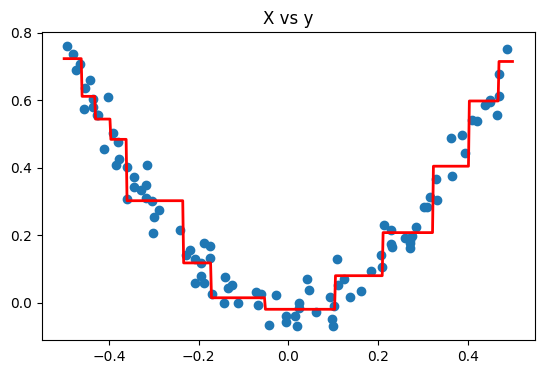

In [ ]:
# model 3 same as model 2
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

* NOTE = max_leaf_nodes= 8 - 32 is best.

**Regression math**

Additive modeling:

if we canot solve by linear regression and  also we cannot use polynominal because of Runge's phenomenon. In the mathematical field of numerical analysis, Runge's phenomenon is a problem of oscillation at the edges of an interval that occurs when using polynomial interpolation with polynomials of high degree over a set of equispaced interpolation points.

What we do is we breakdown the function. This can be combination of multiple function. This is what we do in addative modeling.



For input: training set(xi, yi) i=1 to n, differentiable loss funtion L(y,F(x)), num of iteration M

Loss funtion = you can take any loss function but it needs to be differentiable.

we use least square loss funtion by it is multiple by half. We do 1/2 multipliaction because it would in differentation. It doesnot have any effect because indication of near and far remain as it is.

L= (1/2) * sum i=1 to n (Yi- Yhat i)^2

1. initialize f0(x)= arg min gama (sum i=1 to n L(Yi, gama))

game =  yhat i, Now:

 f0(x)= arg min gama (1/2)*(sum i=1 to n (Yi - gama)^2)

this means we need value of which makes whole function value will be minimun.(optimization)

now for that what we do is we difference whole function with respect to gama so we can get.

d( f0(x))/d gama= d (1/2)*(sum i=1 to n (Yi - gama)^2)/ d gama

sum i=1 to n (gama -Yi) = 0

this will finaly give: gama = Y.mean()

2. for m = 1 to M (Decision Tree)
  
  a. For i = 1, 2, ...N compute

    r im = - [d L(yi, f(xi))/ df(xi)]f=fm-1

      i = row number, m = DT number

      r= residue/ pseudo-residue

      for first DT: ri1 = - [d L(yi, f(xi))/ df(xi)]f=f0

      ri1= -[dL(yi, Yhati)/dyhati]f= f0

      ri1= -[d(1/2)*(yi-yhati)^2/dyhati]f= f0

      =[(yi -yhat i)]f=f0= [(yi -f(xi))]f=f0

      the final is
      ri1= yi - fo(xi)

   b. fit a regression tree to the targets rim giving terminal regions  Rjm , j=1,2......Jm. terminal region meas region whihc is made after slpit by DT. Value is mean of that region output

   c. For j =1 ,2 ,...... jm compute

   gama jm = arg min gama (sum xi E rjm L(yi, fm-1(xi) + gama))

   leaf value formula = gama jm = arg min gama (sum xi E rjm L(yi, fm-1(xi) + gama))

   for model 1 of leaf of 1 : gama j1 = arg min gama (sum xi E ri1 L(yi, fm-1(xi) + gama))

   we only take the value of that whihc is come under that leaf.

   gama 11 = arg min gama (1/2) * (yi - (fo(xi) + gama))^2

   dL/dgama = arg min gama (1/2) * (yi - (fo(xi) + gama))^2

   gama 11 = yi - fo(x) - gama =0

    d. Update fm(x)= fm-1(x) + sum j=1 to Jm(gama jm I(x E Rjm)).

    for f1(x) = fo(x) + DT
    for f2(x) = f1(x) + DT
3. output fx= fM(x).










## Bagging vs Boosting

1. Type of model used:
Bagging (LB HV)= fully grown DT, KNN
train data good but test bad then bagging


Boosting (HB LV): Decision Stumps
test data good but train bad then boosting

2. Sequential vs Parallel:
Bagging= Parallel

Boosting= sequential

3. Weightage of base learners
bagging= similar

boosting = each model has it's own weight. different weight.